In [1]:
from pynter.defects.analysis import DefectsAnalysis

Import the `DefectAnalysis` object from the `json` file

In [2]:
da = DefectsAnalysis.from_json('./data/defects_analysis.json')

Import the `Reservoirs` object containing the chemical potentials 

In [3]:
from pynter.phase_diagram.chempots import Reservoirs

res = Reservoirs.from_json('./data/reservoirs.json')

In [4]:
from pymatgen.electronic_structure.dos import FermiDos
from pynter.tools.utils import get_object_from_json

# import DOS
dos = get_object_from_json(FermiDos,'./data/dos.json')

In [5]:
res.get_dataframe(ndecimals=2)

,Na,Nb,O
A,-2.78,-11.10,-8.85
B,-2.32,-11.22,-8.96
C,-4.32,-21.26,-4.95
D,-4.73,-20.85,-4.95
X,-3.57,-16.25,-6.87


# Filter entries

Choose which defects to analyse. The `DefectsAnalysis` class contains methods to organize and filter the defect entries based on different criteria. In this case (for simplicity) we choose to analyse only the vacancies.

In [6]:
da_vac = da.filter_entries(exclude=True,mode='or',types=['DefectComplex'],elements=['Ca','Sr','Sn'])
da_vac.get_dataframe()

,symbol,delta atoms,charge,multiplicity
name,,,,
Vac_Na,$V_{Na}$,{'Na': -1},-1.0,32
Vac_Na,$V_{Na}$,{'Na': -1},0.0,32
Vac_Na,$V_{Na}$,{'Na': -1},1.0,32
Vac_Nb,$V_{Nb}$,{'Nb': -1},-5.0,32
Vac_Nb,$V_{Nb}$,{'Nb': -1},-4.0,32
Vac_Nb,$V_{Nb}$,{'Nb': -1},-3.0,32
Vac_Nb,$V_{Nb}$,{'Nb': -1},-2.0,32
Vac_Nb,$V_{Nb}$,{'Nb': -1},-1.0,32
Vac_Nb,$V_{Nb}$,{'Nb': -1},0.0,32


# Brouwer Diagram

In [7]:
from pynter.phase_diagram.thermodynamics import OxygenPressure
from pynter.defects.thermodynamics import PressureAnalysis
from pymatgen.core.composition import Composition

In [8]:
pressure_reservoirs = OxygenPressure().get_pressure_reservoirs_from_pd(phase_diagram=res.pd,target_comp=Composition('NaNbO3'),
                                                                       temperature=1300,npoints=20)

In [9]:
pressure_reservoirs.get_dataframe(ndecimals=2)

,Na,Nb,O
1.000000e-20,-2.39,-11.17,-8.95
3.792690e-19,-2.63,-11.55,-8.75
1.438450e-17,-2.73,-12.05,-8.55
5.455595e-16,-2.83,-12.56,-8.34
2.069138e-14,-2.93,-13.07,-8.14
7.847600e-13,-3.03,-13.58,-7.94
2.976351e-11,-3.14,-14.09,-7.73
1.128838e-09,-3.24,-14.60,-7.53
4.281332e-08,-3.34,-15.11,-7.32
1.623777e-06,-3.44,-15.62,-7.12


In [10]:
pa = PressureAnalysis(defects_analysis=da_vac,bulk_dos=dos)

In [11]:
thermodata = pa.get_concentrations(reservoirs=pressure_reservoirs,temperature=1633)

# Plot 

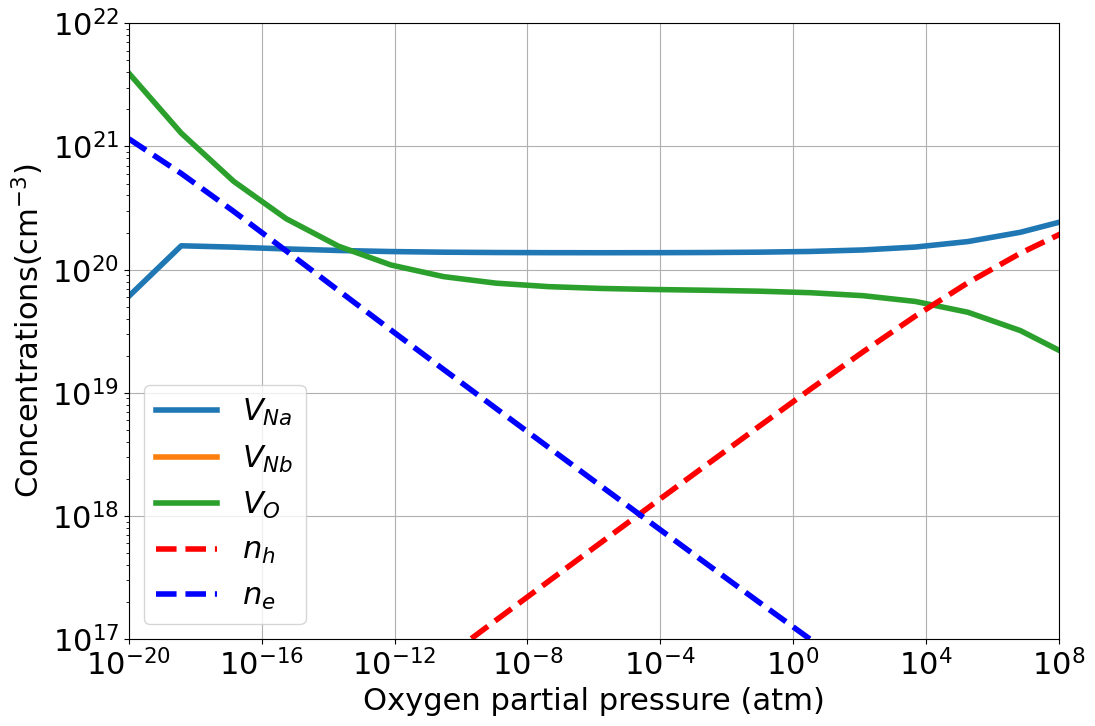

In [12]:
from pynter.defects.plotter import PressurePlotter

plotter = PressurePlotter()
plotter.plot_concentrations(thermodata=thermodata,ylim=(1e17,1e22));

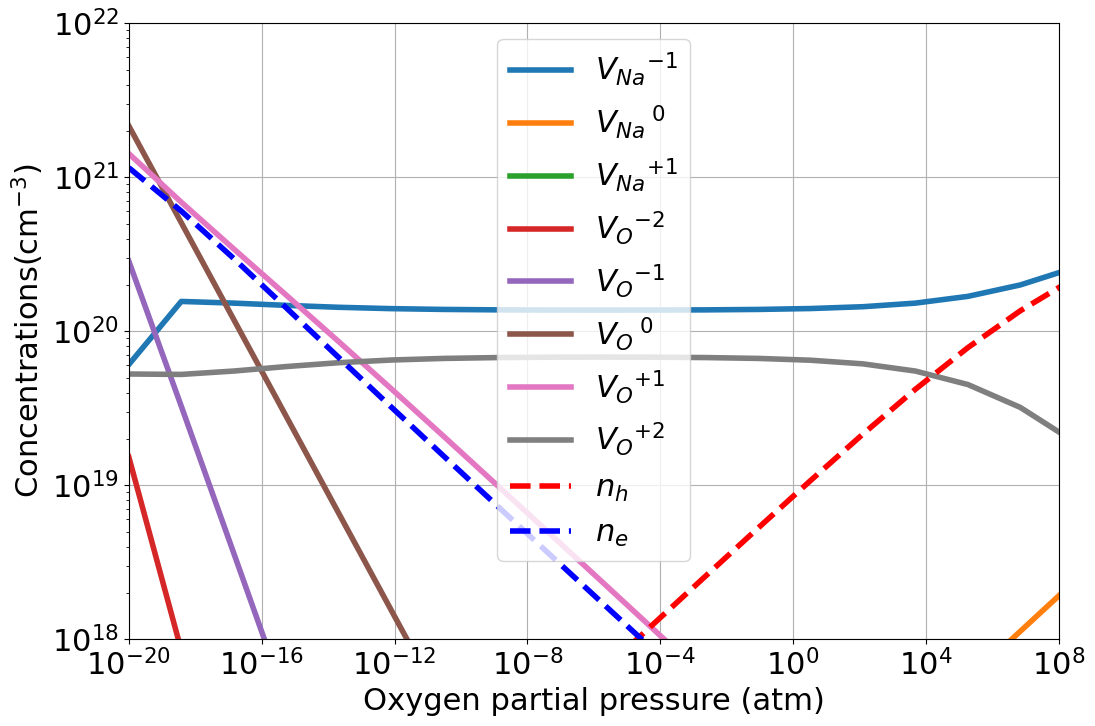

In [13]:
# filter defects to plot
plotter.plot_concentrations(thermodata,ylim=(1e18,1e22),output='all',exclude=True,names=['Vac_Nb']);

In [14]:
thermodata_quenched = pa.get_quenched_fermi_levels(pressure_reservoirs,initial_temperature=1600,final_temperature=300)

/nfshome/villa/pynter/pynter/defects/pmg/pmg_dos.py:1029: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp((fermi - E) / (_cd("Boltzmann constant in eV/K") * T)))


<module 'matplotlib.pyplot' from '/nfshome/villa/miniconda3/envs/recent/lib/python3.11/site-packages/matplotlib/pyplot.py'>

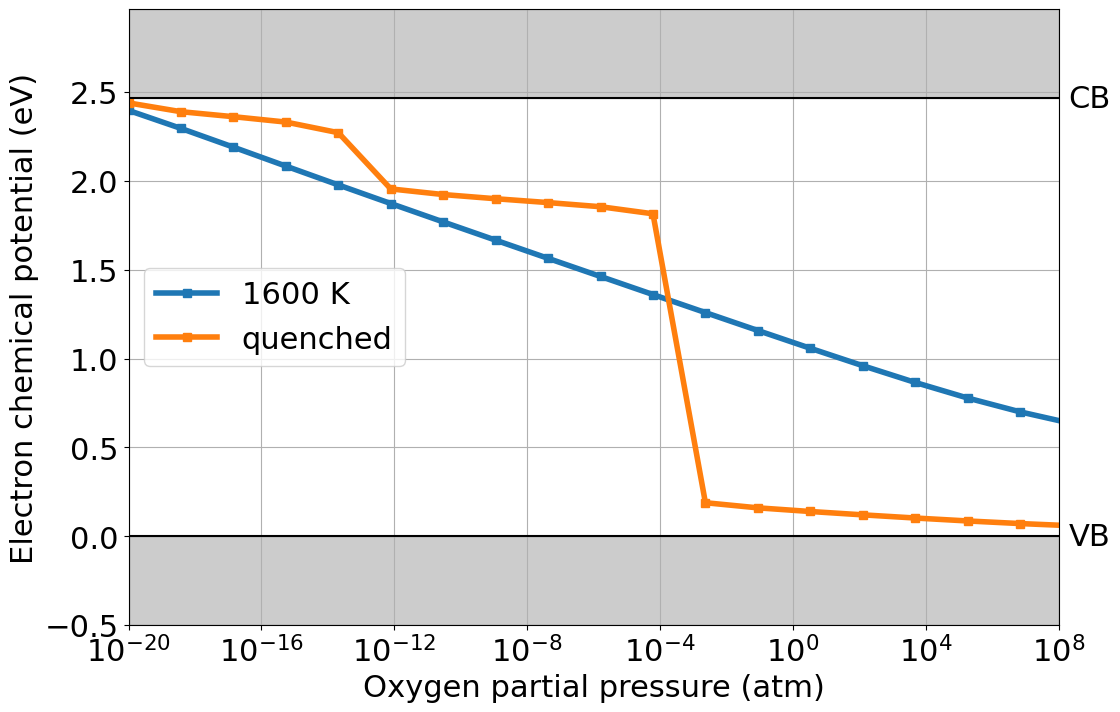

In [15]:
plotter.plot_fermi_level(thermodata.partial_pressures,
                         fermi_levels={'1600 K':thermodata.fermi_levels,'quenched':thermodata_quenched.fermi_levels},band_gap=da.band_gap)

# Extend to extrinsic defects

In [16]:
res_ext = Reservoirs.from_json('./data/reservoirs_extrinsic.json')
# filter Ca out
res_ext.filter_reservoirs(inplace=True,elements=['Na','Nb','O','Sr','Sn'])
res_ext.get_dataframe(ndecimals=2)

,Na,Nb,O,Sr,Sn
A,-2.78,-11.10,-8.85,-5.19,-3.99
B,-2.32,-11.22,-8.96,-5.19,-3.99
C,-4.32,-21.26,-4.95,-8.19,-9.99
D,-4.73,-20.85,-4.95,-8.19,-9.99
X,-3.57,-16.25,-6.87,-7.48,-8.18


In [17]:
# exclude defect complexes and Ca
da_ext = da.filter_entries(exclude=True,mode='or',types=['DefectComplex'],elements=['Ca'])
da_ext.get_dataframe()

,symbol,delta atoms,charge,multiplicity
name,,,,
Sub_Sn_on_Nb,$Sn_{Nb}$,"{'Sn': 1, 'Nb': -1}",-2.0,32
Sub_Sn_on_Nb,$Sn_{Nb}$,"{'Sn': 1, 'Nb': -1}",-1.0,32
Sub_Sn_on_Nb,$Sn_{Nb}$,"{'Sn': 1, 'Nb': -1}",0.0,32
Sub_Sr_on_Na,$Sr_{Na}$,"{'Sr': 1, 'Na': -1}",0.0,32
Sub_Sr_on_Na,$Sr_{Na}$,"{'Sr': 1, 'Na': -1}",1.0,32
Sub_Sr_on_Na,$Sr_{Na}$,"{'Sr': 1, 'Na': -1}",2.0,32
Vac_Na,$V_{Na}$,{'Na': -1},-1.0,32
Vac_Na,$V_{Na}$,{'Na': -1},0.0,32
Vac_Na,$V_{Na}$,{'Na': -1},1.0,32


# The concentration of extrinsic defects is often fixed

In [18]:
site_conc = 5e-03
bulk_structure = da.entries[0].bulk_structure
fixed_conc = site_conc * 1/bulk_structure.lattice.volume *1e24 
fixed_conc

2.530327096933488e+18

In [19]:
extrinsic_chempot_range = {'Sr':(res_ext['A']['Sr'],res_ext['D']['Sr']), 
                           'Sn':(res_ext['A']['Sn'],res_ext['D']['Sn'])}
pressure_reservoirs = OxygenPressure().get_pressure_reservoirs_from_pd(res_ext.pd,Composition('NaNbO3'),temperature=1000,
                                                                       extrinsic_chempots_range=extrinsic_chempot_range,npoints=20)
pressure_reservoirs.get_dataframe(ndecimals=2)

,Na,Nb,O,Sr,Sn
1.000000e-20,-2.99,-13.38,-8.01,-5.34,-4.29
3.792690e-19,-3.07,-13.78,-7.86,-5.49,-4.59
1.438450e-17,-3.15,-14.17,-7.70,-5.64,-4.89
5.455595e-16,-3.23,-14.56,-7.54,-5.79,-5.19
2.069138e-14,-3.31,-14.95,-7.39,-5.94,-5.49
7.847600e-13,-3.39,-15.34,-7.23,-6.09,-5.79
2.976351e-11,-3.46,-15.73,-7.08,-6.24,-6.09
1.128838e-09,-3.54,-16.13,-6.92,-6.39,-6.39
4.281332e-08,-3.62,-16.52,-6.76,-6.54,-6.69
1.623777e-06,-3.70,-16.91,-6.61,-6.69,-6.99


In [20]:
pa = PressureAnalysis(da_ext,dos,fixed_concentrations={'Sr':fixed_conc,'Sn':fixed_conc})
thermodata_ext = pa.get_concentrations(pressure_reservoirs,temperature=1000,name='NN-doped')

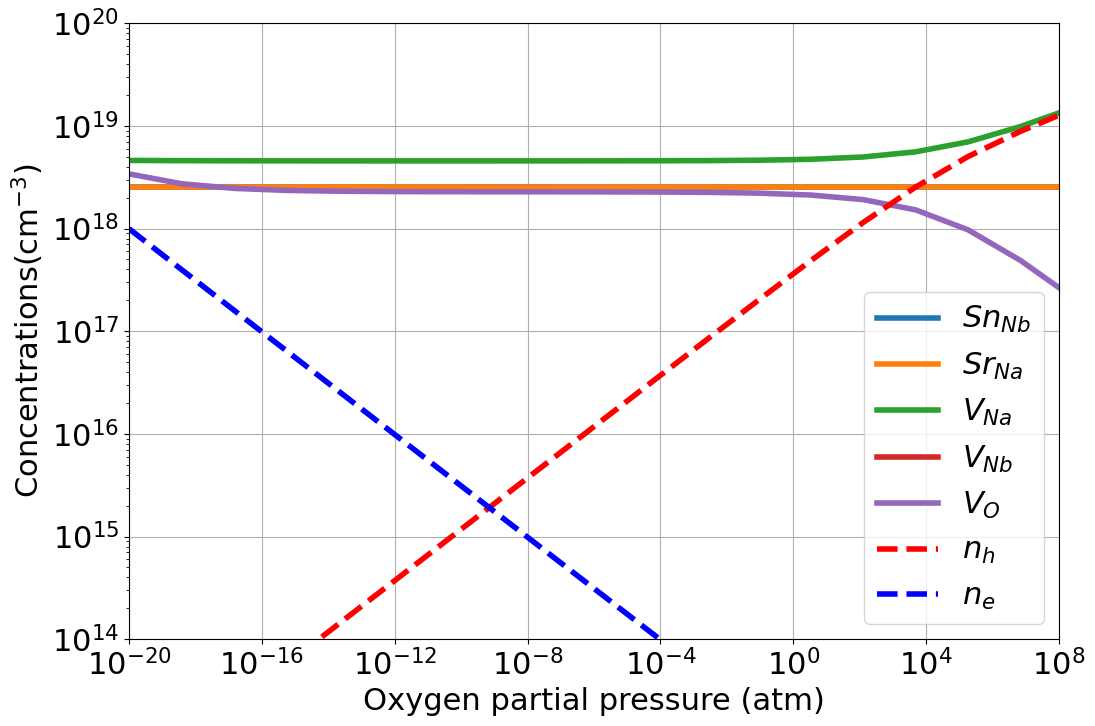

In [21]:
plotter.plot_concentrations(thermodata_ext,ylim=(1e14,1e20));